In [2]:
from Data import Data

import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, jaccard
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.decomposition import PCA

In [4]:
data = Data("dataset/UQDataset_5_5639_m.csv")

In [5]:
c2s = data.get_all_course2student()
s2c = data.get_all_student2course()

df_c2s_int = pd.DataFrame(data.get_int_dataset(c2s))
df_s2c_int = pd.DataFrame(data.get_int_dataset(s2c))

# c2s_int.corr()
# df_s2c_int.corr()

In [19]:
df_s2c_int.loc[0]

0      0
1      0
2      0
3      0
4      0
      ..
101    0
102    0
103    5
104    5
105    7
Name: 0, Length: 106, dtype: int64

In [23]:
cosine_similarity(df_s2c_int.loc[:1])

array([[1.        , 0.59418775],
       [0.59418775, 1.        ]])

In [57]:
from sklearn.cluster import DBSCAN

s_clustering = DBSCAN(eps=0.18, min_samples=4, metric="cosine").fit(df_s2c_int)
silhouette_score(df_s2c_int, s_clustering.labels_)
# df_s2c_int["labels"] = s_clustering.labels_


-0.21780888370851106

In [55]:
# len(s_clustering.core_sample_indices_)
ind = pd.Index(s_clustering.labels_, name="lab")
ind.value_counts()

 0    4122
-1    1330
 1      90
 2      45
 3      20
 4      17
 7      10
 5       8
 6       7
Name: lab, dtype: int64

In [36]:
pca = PCA(n_components= 0.7)
pca.fit(df_s2c_int)
reduc_s2c = pd.DataFrame(pca.transform(df_s2c_int))
reduc_s2c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.497954,9.597543,16.425538,9.138069,-1.680800,-6.405680,4.444043,1.751909,1.758719,1.738746,6.505663,-1.338123,-0.857912,-0.085232,0.408039,1.719517,-1.359859,1.485239,1.050061
1,0.945099,10.600145,2.546389,9.432773,-3.414953,-8.798488,6.033640,-1.328235,-2.723822,-0.767896,-3.253106,2.184355,-1.065460,-2.118656,1.140594,3.914885,-2.839855,-0.317863,3.393077
2,6.157786,3.663281,12.427177,7.427258,1.982838,-1.288261,2.044171,1.883736,5.165606,0.589816,0.456358,1.792576,-1.932700,0.469279,0.689631,2.755073,0.132434,2.710515,2.598256
3,6.969046,16.299809,13.164415,5.926894,-4.073777,-5.369934,4.766312,3.353617,3.058752,3.274284,0.268818,-1.265502,-5.455818,-0.307831,1.572778,4.932488,-4.106375,0.151423,1.810798
4,17.789336,10.654217,8.273814,0.707623,-4.136167,-2.449910,4.015440,5.786886,4.594914,-2.102397,-1.679552,5.104877,3.252904,4.537789,-2.174268,1.443109,-1.877755,4.865536,0.198245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5644,-1.089301,-4.819144,-4.979728,-0.656260,-0.632339,1.423063,0.461989,2.648208,-0.281261,1.764805,-0.421826,1.654575,1.042999,0.861838,0.352208,0.163509,0.055321,-0.791763,0.171190
5645,-1.089301,-4.819144,-4.979728,-0.656260,-0.632339,1.423063,0.461989,2.648208,-0.281261,1.764805,-0.421826,1.654575,1.042999,0.861838,0.352208,0.163509,0.055321,-0.791763,0.171190
5646,-1.089301,-4.819144,-4.979728,-0.656260,-0.632339,1.423063,0.461989,2.648208,-0.281261,1.764805,-0.421826,1.654575,1.042999,0.861838,0.352208,0.163509,0.055321,-0.791763,0.171190
5647,-1.089301,-4.819144,-4.979728,-0.656260,-0.632339,1.423063,0.461989,2.648208,-0.281261,1.764805,-0.421826,1.654575,1.042999,0.861838,0.352208,0.163509,0.055321,-0.791763,0.171190


In [11]:


pca.fit(df_c2s_int)
reduc_c2s  = pd.DataFrame(pca.transform(df_c2s_int))

reduc_s2c


,0,1,2,3
0,-0.587189,-0.531297,-0.851307,-0.169208
1,0.421084,-1.249571,1.072379,0.624254
2,-0.537593,-0.532693,-0.736470,-0.080206
3,0.988489,0.002414,-0.031906,0.500726
4,-1.311663,-0.456378,-0.318522,-0.152155
...,...,...,...,...
101,0.228579,-0.701309,0.703816,0.360438
102,-0.422442,0.099676,-0.251672,0.023129
103,-1.913188,-0.326239,-0.339645,-0.331733
104,-1.005572,0.792866,-0.500141,-0.094938


In [68]:
# Clouse clustering

course_distance = pd.DataFrame(pairwise_distances(df_s2c_int.corr(), metric="correlation"))
course_distance


,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,0.000000,1.181216,0.333895,1.256404,0.623350,1.329683,1.067364,0.854030,1.137997,1.152174,...,0.971022,0.871449,0.944049,1.151417,1.160337,0.726303,0.559186,0.619922,0.579999,1.352117
1,1.181216,0.000000,1.159017,0.955738,1.197481,0.873288,1.099368,1.110460,0.256210,0.250462,...,1.033171,1.014654,0.978562,1.056269,0.224880,1.193381,1.265669,1.501455,1.412915,1.164540
2,0.333895,1.159017,0.000000,1.279020,0.606975,1.334200,1.053857,0.773616,1.125619,1.139441,...,0.988696,0.945597,0.990489,1.174309,1.146550,0.830877,0.545332,0.715334,0.648081,1.362145
3,1.256404,0.955738,1.279020,0.000000,1.469295,0.499181,0.812050,1.282092,0.962856,0.967255,...,0.883718,0.759847,0.887637,0.126125,1.013190,1.178523,1.534934,1.100284,1.532958,1.002631
4,0.623350,1.197481,0.606975,1.469295,0.000000,1.557175,1.272870,0.629317,1.145989,1.173018,...,1.108583,1.261507,1.217521,1.282314,1.160060,0.805774,0.120865,0.754264,0.399604,1.174511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.726303,1.193381,0.830877,1.178523,0.805774,1.291623,1.076780,0.938042,1.142674,1.152685,...,1.011366,1.134341,1.066668,1.075338,1.154109,0.000000,0.760336,0.623502,0.650778,0.999183
103,0.559186,1.265669,0.545332,1.534934,0.120865,1.655591,1.283602,0.615542,1.194731,1.226488,...,1.104327,1.307685,1.269842,1.314873,1.207269,0.760336,0.000000,0.601859,0.243019,1.137083
104,0.619922,1.501455,0.715334,1.100284,0.754264,1.396923,0.819266,1.005402,1.370258,1.394759,...,0.896797,1.200001,1.188415,0.946275,1.391270,0.623502,0.601859,0.000000,0.271408,1.003257
105,0.579999,1.412915,0.648081,1.532958,0.399604,1.640112,1.138212,0.792906,1.295842,1.323753,...,1.019289,1.295318,1.266562,1.333720,1.306354,0.650778,0.243019,0.271408,0.000000,0.981754


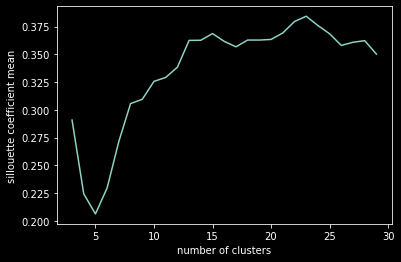

In [117]:
# silhouette:

sil_coe = []
for n in range(3,30):
    clustering = AgglomerativeClustering(n_clusters=n, affinity="precomputed", linkage="complete").fit(reduc_s2c)
    labels = clustering.labels_
    sil_coe.append(silhouette_score(course_distance, labels, metric="precomputed"))


n = list(range(3,30))
sil_plot = plt.figure()
plt.plot(n, sil_coe)
plt.xlabel("number of clusters")
plt.ylabel("sillouette coefficient mean")
plt.show()

In [98]:
clustering = AgglomerativeClustering(n_clusters=23, affinity="precomputed", linkage="complete", compute_full_tree=False).fit(course_distance)
labels = clustering.labels_
course_distance["label"] = labels
c2s = pd.DataFrame(c2s)


In [91]:
c2s.shape

(106, 5649)

In [99]:
labels = labels[1:]
labels.shape

(106,)

In [103]:
record = np.zeros(5649).astype(np.int64)
ind = np.array([2,5,7,98,1,9,10])
record[ind] = [5,7,3,6,4,5,5]
record = np.array([record])
record.shape

(1, 5649)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(c2s, labels)
knn.predict(record)

array([0], dtype=int64)

In [85]:
import numpy as np 
record = np.zeros(107).astype(np.int64)
ind = np.array([2,45,87])
record[ind] = [5,6,6]
# record = pd.DataFrame(record)
# record[np.newaxis,:]
record.reshape(1,-1)
record = np.array([record])
record

array([[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [87]:
clustering.fit_predict(record)

ValueError: Found array with 1 sample(s) (shape=(1, 107)) while a minimum of 2 is required by AgglomerativeClustering.

In [119]:
import pickle


In [120]:
for n in range(0,23):
    c1 = course_distance[course_distance["label"] == n].index

    ind2code = pickle.load(open("temp/course_index_to_code.txt", "rb"))
    code2name = pickle.load(open("temp/course_code_to_name.txt", "rb"))
    print(len(c1))
    for index in c1:
        print(ind2code[str(index)][0])
        print(code2name[ind2code[str(index)][0]])

9
engg7302
Advanced Computational Techniques in Engineering

elec7901
Advanced Medical Device Engineering

coms7305
Advanced Microwave Engineering

elec7902
Clinical Biomedical Signal Processing

elec7310
Electricity Market Operation and Security

engg7802
Engineering Postgraduate Project B

elec7309
Power System Planning and Reliability

elec7313
Renewable Energy Integration: Technologies to Technical Challenges

elec7051
Transformer Technology Design and Operation

5
comp6803
Computer Science Research Project (S1 start)

comp6804
Computer Science Research Project (S2 start)

infs4203
Data Mining

engg7811
Research Methods

infs4205
Spatial and Multimedia Databases

6
csse2310
Computer Systems Principles and Programming

engg1200
Engineering Modelling & Problem Solving

csse2010
Introduction to Computer Systems

metr4201
Introduction to Control Systems

engg1300
Introduction to Electrical Systems

engg1100
Introduction to Engineering Design

3
deco4500
Advanced Human-Computer Interact

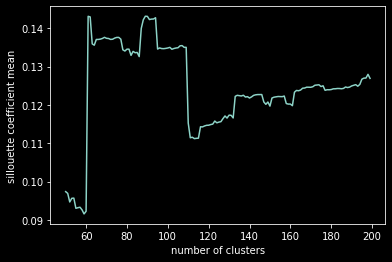

In [6]:
# clusteirng student
df_s2c_int[df_s2c_int != 0] = 1
bin_s2c = pd.DataFrame(df_s2c_int)
distance = pd.DataFrame(pairwise_distances(bin_s2c, metric="hamming"))
jac_sim = 1 - pairwise_distances(bin_s2c, metric="hamming")
jac_sim = pd.DataFrame(jac_sim)    

sil_coe = []
for n in range(50,200):
    std_clustering = AgglomerativeClustering(n_clusters=n, affinity="precomputed", linkage="complete").fit(distance)
    labels = std_clustering.labels_
    sil_coe.append(silhouette_score(distance, labels, metric="precomputed"))


n = list(range(50,200))
sil_plot = plt.figure()
plt.plot(n, sil_coe)
plt.xlabel("number of clusters")
plt.ylabel("sillouette coefficient mean")
plt.show()





In [87]:
distance

,0,1,2,3,4,5,6,7,8,9,...,5639,5640,5641,5642,5643,5644,5645,5646,5647,5648
0,0.000000,0.198113,0.122642,0.132075,0.283019,0.264151,0.320755,0.226415,0.132075,0.188679,...,0.301887,0.301887,0.301887,0.301887,0.301887,0.301887,0.301887,0.301887,0.301887,0.301887
1,0.198113,0.000000,0.188679,0.122642,0.235849,0.292453,0.424528,0.216981,0.122642,0.179245,...,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585
2,0.122642,0.188679,0.000000,0.122642,0.254717,0.311321,0.349057,0.216981,0.122642,0.179245,...,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585,0.273585
3,0.132075,0.122642,0.122642,0.000000,0.207547,0.301887,0.320755,0.150943,0.056604,0.113208,...,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151
4,0.283019,0.235849,0.254717,0.207547,0.000000,0.452830,0.358491,0.207547,0.226415,0.188679,...,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5644,0.301887,0.273585,0.273585,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5645,0.301887,0.273585,0.273585,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5646,0.301887,0.273585,0.273585,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5647,0.301887,0.273585,0.273585,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [128]:
s_clustering = AgglomerativeClustering(n_clusters=2000, affinity="precomputed", linkage="complete").fit(distance)
labels = s_clustering.labels_
distance["label"] = labels


In [129]:
for n in range(0,2000):
    c2 = distance[distance["label"] == n].index

    ind2code = pickle.load(open("temp/course_index_to_code.txt", "rb"))
    code2name = pickle.load(open("temp/course_code_to_name.txt", "rb"))
    print(len(c2))
#     for index in c1:
#         print(ind2code[str(index)][0])
#         print(code2name[ind2code[str(index)][0]])

7
4
3
10
2
3
2
2
4
6
2
2
3
2
3
3
3
2
2
5
9
3
6
4
4
2
5
5
3
2
15
8
6
3
10
2
9
2
3
6
4
2
3
2
4
2
2
2
3
5
6
8
3
4
2
2
3
4
3
2
2
3
2
5
2
5
3
14
5
3
3
2
42
7
2
3
9
2
6
3
3
26
4
14
2
3
2
2
7
2
8
5
2
2
2
2
2
8
2
2
19
2
4
4
3
3
2
3
8
2
2
2
4
10
10
6
3
4
6
3
2
19
4
19
2
12
32
13
4
3
2
3
2
2
3
5
8
2
3
6
10
3
5
2
52
6
5
3
4
2
9
2
6
3
2
3
2
9
2
2
2
3
7
2
7
6
3
5
3
6
15
5
4
3
3
13
2
26
11
2
2
6
5
3
3
3
2
3
119
8
4
7
7
3
2
3
7
5
8
2
2
6
2
3
2
16
7
2
6
2
2
2
4
5
2
62
3
2
2
2
6
27
2
2
3
4
5
4
19
5
4
4
9
9
28
11
2
4
2
3
2
2
4
2
4
4
3
2
5
2
5
3
2
2
3
3
2
6
2
3
2
10
2
4
6
2
3
3
1
3
19
5
2
2
3
2
3
5
5
11
3
4
1
8
2
5
2
2
3
1
5
3
2
9
2
3
3
2
3
2
7
3
2
6
2
2
5
13
2
2
2
2
3
2
4
7
2
3
3
5
17
4
2
5
2
10
3
3
8
2
4
23
2
2
3
5
16
1
4
2
11
4
5
7
4
2
7
10
2
2
3
7
7
8
3
3
2
3
5
5
24
2
5
2
2
2
9
3
3
3
6
2
3
2
4
2
1
12
3
2
4
3
3
3
2
2
2
7
9
2
2
8
2
2
1
4
3
3
2
3
3
4
2
5
5
2
3
2
2
1
3
2
2
1
12
2
2
2
2
7
5
2
2
10
1
5
2
2
7
5
2
2
34
2
1
4
6
3
33
1
1
4
2
3
3
2
2
2
2
3
2
10
7
2
2
3
2
4
9
2
3
2
6
2
3
4
2
2
5
4
9
9
22
4
5
3
2